In [1]:
# Import packages
import numpy as np
import time 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#import math
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

In [2]:
import datetime
from datetime import datetime
from datetime import timedelta

In [3]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

Using TensorFlow backend.


Prerequisites: pip install keras (similarly tensorflow, xgboost, etc.) from  prompt (anaconda in my case)

In [4]:
#used as temporary solution - if there's time must fill missing values in a more meaningful way
df = pd.read_csv('data.csv').fillna(method='ffill')


#  drop dups
df.drop_duplicates(keep=False,inplace=True) 
df.head(15)

,Date,P,D,E,CPI,Fraction,GS10,Price,Dividend,Earnings
0,"1871,01","4,44","0,26","0,40","12,46","1871,04","5,32","91,37","5,35","8,23"
1,"1871,02","4,50","0,26","0,40","12,84","1871,13","5,32","89,86","5,19","7,99"
2,"1871,03","4,61","0,26","0,40","13,03","1871,21","5,33","90,71","5,12","7,87"
3,"1871,04","4,74","0,26","0,40","12,56","1871,29","5,33","96,81","5,31","8,17"
4,"1871,05","4,86","0,26","0,40","12,27","1871,37","5,33","101,57","5,43","8,36"
5,"1871,06","4,82","0,26","0,40","12,08","1871,46","5,34","102,32","5,52","8,49"
6,"1871,07","4,73","0,26","0,40","12,08","1871,54","5,34","100,41","5,52","8,49"
7,"1871,08","4,79","0,26","0,40","11,89","1871,62","5,34","103,31","5,61","8,63"
8,"1871,09","4,84","0,26","0,40","12,18","1871,71","5,35","101,94","5,48","8,42"
9,"1871,1","4,59","0,26","0,40","12,37","1871,79","5,35","95,19","5,39","8,30"


In [5]:
#df.info()

In [6]:
def parse_date(date):
    year, month = date.split(",", maxsplit=1)
    if month == "1":
        month = "10"
    return datetime(int(year), int(month), 1)

In [7]:
# dropping Fractions column as the initial research shown it is not adding much value
# e.g. https://datahub.io/core/s-and-p-500
df.drop("Fraction", axis=1, inplace=True)

In [8]:
df['Date'] = df['Date'].apply(parse_date)

In [9]:
df.head(25)

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings
0,1871-01-01,"4,44","0,26","0,40","12,46","5,32","91,37","5,35","8,23"
1,1871-02-01,"4,50","0,26","0,40","12,84","5,32","89,86","5,19","7,99"
2,1871-03-01,"4,61","0,26","0,40","13,03","5,33","90,71","5,12","7,87"
3,1871-04-01,"4,74","0,26","0,40","12,56","5,33","96,81","5,31","8,17"
4,1871-05-01,"4,86","0,26","0,40","12,27","5,33","101,57","5,43","8,36"
5,1871-06-01,"4,82","0,26","0,40","12,08","5,34","102,32","5,52","8,49"
6,1871-07-01,"4,73","0,26","0,40","12,08","5,34","100,41","5,52","8,49"
7,1871-08-01,"4,79","0,26","0,40","11,89","5,34","103,31","5,61","8,63"
8,1871-09-01,"4,84","0,26","0,40","12,18","5,35","101,94","5,48","8,42"
9,1871-10-01,"4,59","0,26","0,40","12,37","5,35","95,19","5,39","8,30"


In [10]:
df = df.set_index('Date')

In [11]:
# those are dtype (str) type of objects and need to be converted
df['P'].apply(type).value_counts()

<class 'str'>    1783
Name: P, dtype: int64

In [12]:
# defining auxiliary cleaning function
def clean_column(x):
    """ the values are str objects containing ',' those have been replaced with '.'
    """
    if isinstance(x, str):
        return(x.replace(',', '.'))
    return(x)

In [13]:
cols = df.columns[df.dtypes.eq('object')]
cols

Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings'], dtype='object')

In [14]:
#selecting all 'object' type of columns in one shot
# there might be even shorter way - skipping for loop - investigate later if time permits
cols = df.columns[df.dtypes.eq('object')]

for column in cols:
    df[column] = df[column].apply(clean_column).astype('float')

In [15]:
df.head(10)

,P,D,E,CPI,GS10,Price,Dividend,Earnings
Date,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23
1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99
1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87
1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17
1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36
1871-06-01,4.82,0.26,0.4,12.08,5.34,102.32,5.52,8.49
1871-07-01,4.73,0.26,0.4,12.08,5.34,100.41,5.52,8.49
1871-08-01,4.79,0.26,0.4,11.89,5.34,103.31,5.61,8.63
1871-09-01,4.84,0.26,0.4,12.18,5.35,101.94,5.48,8.42


### rephrase: 
we should normalize tha data and draw autocorrelatin on log returns 
while looking up for patterns .
Log returns are considered a standard transforamtional practice

In [16]:
# we used conversion to Series to facilitate out operations
# nice outline for reference: https://www.geeksforgeeks.org/python-pandas-series/
df['pct_change'] = df['P'].pct_change().fillna(method='bfill')
df['log_ret_1_mth'] = np.log(df['P'] / df['P'].shift(1)).fillna(method='bfill')

df['Log_Ret_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).sum()
df['Log_Ret_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).sum()
df['Log_Ret_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).sum()
df['Log_Ret_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).sum()
df['Log_Ret_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).sum()
df['Log_Ret_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).sum()


In [17]:
# for monthly to annualized vol. (which is normally used) 
#we multiply the right side by sqrt(12) https://breakingdownfinance.com/finance-topics/finance-basics/annualize-volatility/
# note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is (N- ddof), where N=len(Series) represents the number of elements

df['volat_2_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(2).std(ddof=0)*np.sqrt(12)
df['volat_3_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(3).std(ddof=0)*np.sqrt(12)
df['volat_4_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(4).std(ddof=0)*np.sqrt(12)
df['volat_8_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(8).std(ddof=0)*np.sqrt(12)
df['volat_12_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(12).std(ddof=0)*np.sqrt(12)
df['volat_48_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(48).std(ddof=0)*np.sqrt(12)


In [18]:
df = df.fillna(method='bfill')

In [19]:
# Label data: Up (Down) if the the 1 month logarithmic return increased (decreased)
# shift index axis by a period in negative direction 
 
df['dir']=np.where(df['log_ret_1_mth'] > 0, 1, 0)

In [20]:
# backfilling with same values, CAPE, volatilities, rolling earning means 
# should not impact much since those are NaN's primarily in 1870's
df = df.iloc[:].fillna(method='bfill')

In [21]:
df.head()

,P,D,E,CPI,GS10,Price,Dividend,Earnings,pct_change,log_ret_1_mth,...,Log_Ret_8_mth,Log_Ret_12_mth,Log_Ret_48_mth,volat_2_mth,volat_3_mth,volat_4_mth,volat_8_mth,volat_12_mth,volat_48_mth,dir
Date,,,,,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23,0.013514,0.013423,...,0.089299,0.078806,0.035696,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99,0.013514,0.013423,...,0.089299,0.078806,0.035696,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87,0.024444,0.024150,...,0.089299,0.078806,0.035696,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17,0.028200,0.027809,...,0.089299,0.078806,0.035696,1.121817,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36,0.025316,0.025001,...,0.089299,0.078806,0.035696,0.437297,1.313272,1.21409,3.184724,6.501847,16.478317,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P               1783 non-null   float64
 1   D               1783 non-null   float64
 2   E               1783 non-null   float64
 3   CPI             1783 non-null   float64
 4   GS10            1783 non-null   float64
 5   Price           1783 non-null   float64
 6   Dividend        1783 non-null   float64
 7   Earnings        1783 non-null   float64
 8   pct_change      1783 non-null   float64
 9   log_ret_1_mth   1783 non-null   float64
 10  Log_Ret_2_mth   1783 non-null   float64
 11  Log_Ret_3_mth   1783 non-null   float64
 12  Log_Ret_4_mth   1783 non-null   float64
 13  Log_Ret_8_mth   1783 non-null   float64
 14  Log_Ret_12_mth  1783 non-null   float64
 15  Log_Ret_48_mth  1783 non-null   float64
 16  volat_2_mth     1783 non-null   float64
 17  volat_3_mth    

In [23]:
# list rows and columns
print("Rows, Columns:")
print(df.shape)

# list columns
print("Columns:")
print(df.columns)

Rows, Columns:
(1783, 23)
Columns:
Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings',
       'pct_change', 'log_ret_1_mth', 'Log_Ret_2_mth', 'Log_Ret_3_mth',
       'Log_Ret_4_mth', 'Log_Ret_8_mth', 'Log_Ret_12_mth', 'Log_Ret_48_mth',
       'volat_2_mth', 'volat_3_mth', 'volat_4_mth', 'volat_8_mth',
       'volat_12_mth', 'volat_48_mth', 'dir'],
      dtype='object')


The comparison above was to make an assumption that plain vanilla LSTM might outperform baseline models like ARIMA in some circumstances.
However, to date there is no reliable technique exists that would predict exact future prices. Instead, researchers in this domain are working on problems like those of predicting market movement direction, market regime switch, exponential bubble-like behaviour etc.
Let's take one step further and implement multivariate LSTM with different features in attempt to find likely market move direction. Examples of such work could be found bot not limited to Chen et. al. (2015), [7]


#### LSTM with multiple features

In [24]:
# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [25]:
"""# Tf Keras - run cautiously
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier"""

'# Tf Keras - run cautiously\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM\n\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.wrappers.scikit_learn import KerasClassifier'

In [26]:

# dropping justified by high intercorrelation of Price and Aggregate Price, Earnings vs Aggregate Earnings, etc.
df=df.drop(['Price','Dividend','Earnings'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P               1783 non-null   float64
 1   D               1783 non-null   float64
 2   E               1783 non-null   float64
 3   CPI             1783 non-null   float64
 4   GS10            1783 non-null   float64
 5   pct_change      1783 non-null   float64
 6   log_ret_1_mth   1783 non-null   float64
 7   Log_Ret_2_mth   1783 non-null   float64
 8   Log_Ret_3_mth   1783 non-null   float64
 9   Log_Ret_4_mth   1783 non-null   float64
 10  Log_Ret_8_mth   1783 non-null   float64
 11  Log_Ret_12_mth  1783 non-null   float64
 12  Log_Ret_48_mth  1783 non-null   float64
 13  volat_2_mth     1783 non-null   float64
 14  volat_3_mth     1783 non-null   float64
 15  volat_4_mth     1783 non-null   float64
 16  volat_8_mth     1783 non-null   float64
 17  volat_12_mth   

The code below was adapted to this task using [1] (please see in references)

In [28]:
# fix random seed for reproducibility
np.random.seed(7)


In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
#pandas series to numpy
# Transform price
dataset = np.array(df['pct_change']).reshape((len(df['pct_change']), 1))
dataset

array([[ 0.01351351],
       [ 0.01351351],
       [ 0.02444444],
       ...,
       [-0.01690543],
       [ 0.01242158],
       [ 0.02967992]])

In [32]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [33]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/10
 - 2s - loss: 0.0099
Epoch 2/10
 - 2s - loss: 0.0029
Epoch 3/10
 - 1s - loss: 0.0029
Epoch 4/10
 - 1s - loss: 0.0029
Epoch 5/10
 - 1s - loss: 0.0029
Epoch 6/10
 - 2s - loss: 0.0029
Epoch 7/10
 - 2s - loss: 0.0029
Epoch 8/10
 - 2s - loss: 0.0029
Epoch 9/10
 - 2s - loss: 0.0029
Epoch 10/10
 - 2s - loss: 0.0029
Train Score: 0.04 RMSE
Test Score: 0.03 RMSE


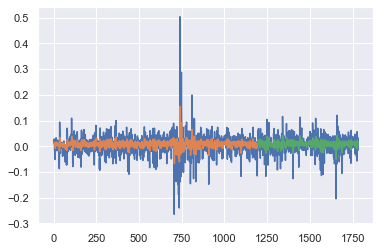

In [34]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Here we have the real percentage change is _blue_ ;

predictions using  'pct_change' feature on training dataset in _orange_ ;

and predictions using same feature on unseen test dataset in _green_

#### References

[1] weblink: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/